In [46]:
import pandas as pd
from plotnine import *
from sklearn.preprocessing import LabelEncoder
import os

In [5]:
os.listdir('../data/')

['application_test.csv',
 'application_train.csv',
 'bureau.csv.zip',
 'bureau_balance.csv.zip',
 'credit_card_balance.csv.zip',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv.zip',
 'POS_CASH_balance.csv.zip',
 'previous_application.csv.zip',
 'sample_submission.csv.zip']

In [10]:
train_set = pd.read_csv('../data/application_train.csv')
print(train_set.shape)
train_set.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test_set = pd.read_csv('../data/application_test.csv')
print(test_set.shape)
test_set.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train_set.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


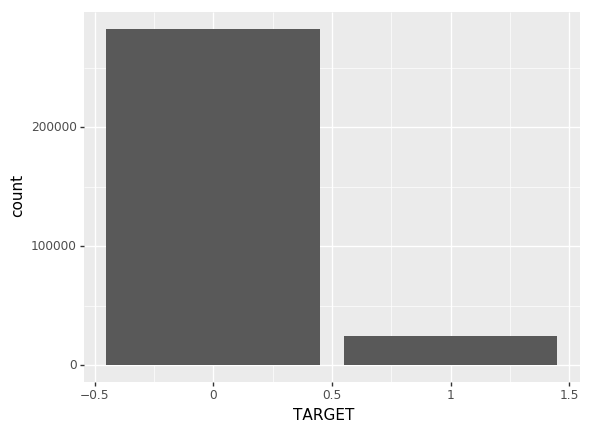

<ggplot: (150605366606)>

In [21]:
(ggplot(train_set, aes(x='TARGET')) + geom_bar())

In [32]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        missing_vals = df.isnull().sum()
        
        # Percentage of missing values
        missing_vals_percent = 100 * missing_vals / len(df)
        
        # Make a table with the results
        missing_vals_table = pd.concat([missing_vals, missing_vals_percent], axis=1)
        
        # Rename the columns
        missing_vals_table_ren_columns = missing_vals_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total'})
        
        # Sort the table by percentage of missing descending
        missing_vals_table_ren_columns = missing_vals_table_ren_columns[
            missing_vals_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total', ascending=False).round(2)
        
        # Print some summary information
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missing_vals_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return missing_vals_table_ren_columns

In [33]:
missing_vals = missing_values_table(train_set)

The selected dataframe has 122 columns.
There are 67 columns that have missing values.


In [34]:
missing_vals.head(10)

,Missing Values,% of Total
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35


In [31]:
missing_vals.tail(10)

,Missing Values,% of Total
NAME_TYPE_SUITE,1292,0.4
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0
DAYS_LAST_PHONE_CHANGE,1,0.0


In [36]:
train_set.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [38]:
train_set.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [39]:
train_set.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


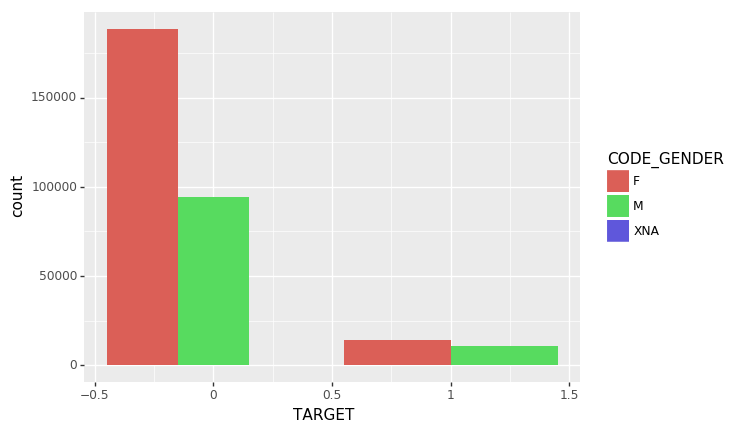

<ggplot: (-9223371886247138444)>

In [47]:
(ggplot(train_set, aes(x='TARGET', fill='CODE_GENDER')) + geom_bar(position='dodge'))

In [48]:
train_set['TARGET_STR'] = train_set.TARGET.transform(lambda x: str(x))

C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


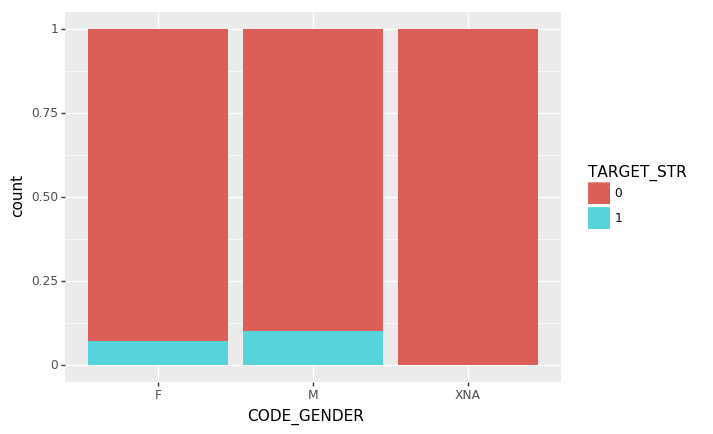

<ggplot: (-9223371886224940505)>

In [51]:
(ggplot(train_set, aes(x='CODE_GENDER', fill='TARGET_STR')) + geom_bar(position='fill'))

In [40]:
train_set.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


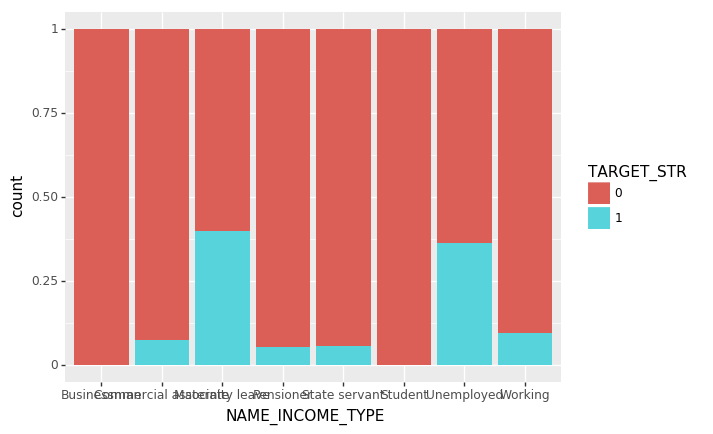

<ggplot: (150629881229)>

In [58]:
(ggplot(train_set, aes(x='NAME_INCOME_TYPE', fill='TARGET_STR')) + 
 geom_bar(position='fill')
)

In [59]:
train_set.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


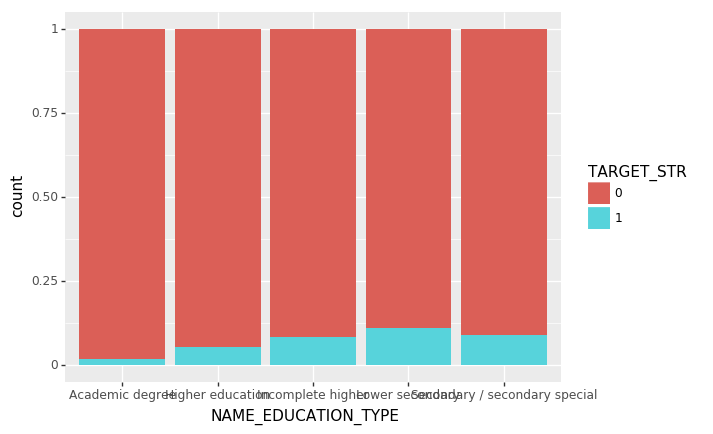

<ggplot: (-9223371886224922673)>

In [60]:
(ggplot(train_set, aes(x='NAME_EDUCATION_TYPE', fill='TARGET_STR')) + 
 geom_bar(position='fill')
)

In [61]:
train_set.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


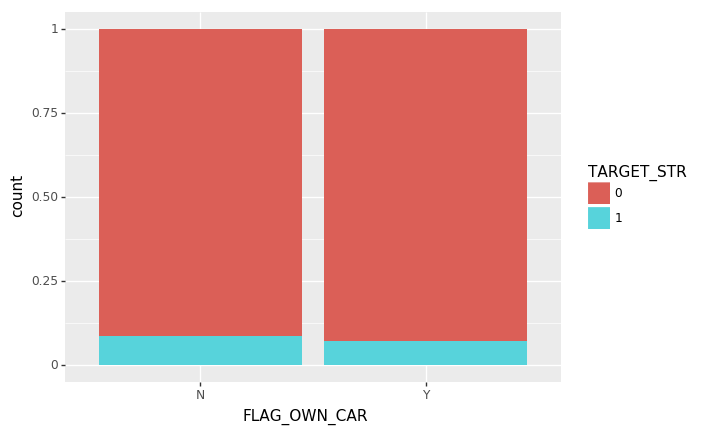

<ggplot: (-9223371886224873086)>

In [62]:
(ggplot(train_set, aes(x='FLAG_OWN_CAR', fill='TARGET_STR')) + 
 geom_bar(position='fill')
)

In [68]:
train_set.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [85]:
def rename_vals(x):
    if x == 'Working':
        return 'WORKS'
    elif x == 'Commercial associate':
        return 'COM.ASS.'
    elif x == 'Pensioner':
        return 'PEN.'
    elif x == 'State servant':
        return 'STATE'
    elif x == 'Maternity leave':
        return 'MATERNITY'
    elif x == 'Businessman':
        return 'BUSIN.'
    elif x == 'Unemployed':
        return 'UNEMP.'
    else:
        return str.upper(x)

In [86]:
train_set['EDA_INCOME'] = train_set.NAME_INCOME_TYPE.transform(lambda x: rename_vals(x))

C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\A230661\AppData\Local\conda\conda\envs\py3-general\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


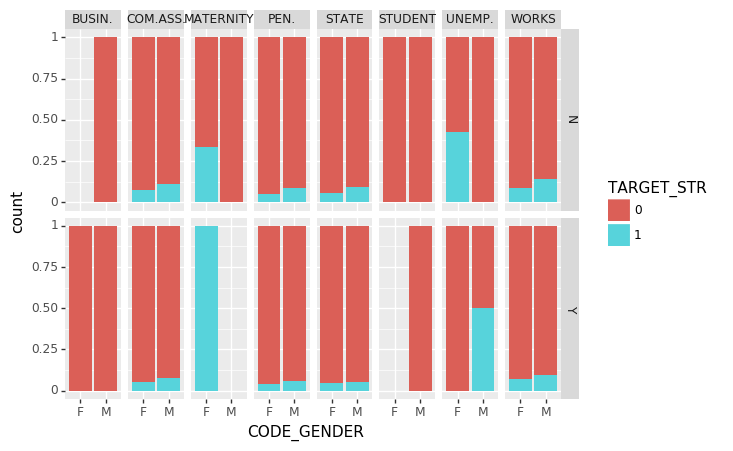

<ggplot: (150607674383)>

In [89]:
(
    ggplot(train_set[train_set['CODE_GENDER'] != 'XNA'], aes(x='CODE_GENDER', fill='TARGET_STR')) + 
    geom_bar(position='fill') +
    facet_grid(['FLAG_OWN_CAR', 'EDA_INCOME'])
)